# Linear regression (Multivariate)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import pandas as pd

In [2]:
Data=pd.read_csv('./neeraj/kc_house_data.csv')

In [3]:
Data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
Data.shape

(21613, 21)

## Spliting of data

In [5]:
TrainData , TestData = np.split(Data,[int(0.7*len(Data))])

In [6]:
print(TrainData.shape,TestData.shape)

(15129, 21) (6484, 21)


In [7]:
TrainData.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## Data visualization 

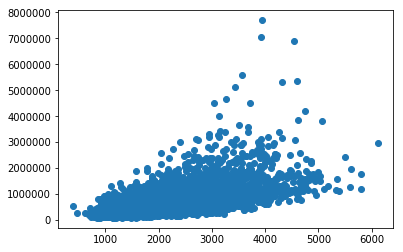

In [20]:
plt.scatter(TrainData['sqft_living15'],TrainData['price'])
plt.show()

## Data preprocessing 
- droping unrelavant feature

In [9]:
X=np.array(TrainData.drop(['id','date','price'],axis=1))
Y=np.array(TrainData['price'])

In [10]:
print(X.shape)
print(Y.shape)

(15129, 18)
(15129,)


In [11]:
xtest=np.array(TestData.drop(['id','date','price'],axis=1))
ytest=np.array(TestData['price'])

In [12]:
print(xtest.shape)


(6484, 18)


In [13]:
print(ytest.shape)

(6484,)


## Cost function 
- help us to determine to how much bad our model

In [14]:
def cost(Thetas, Theta1, x, y):
    return np.mean(((np.dot(x, Thetas) + Theta1).T) - y)

## Gradient descent algorithm
- Here is 18 theta for each columns and one for Bias
- alpha is learning rate
- we will take mean of gradient's


In [15]:
Thetas = np.random.randn(18,1)
Theta1 = np.random.randn(1,1)
error_list=[]

alpha = 0.00000000009
for i in range(0,150):
    e=cost(Thetas,Theta1,X,Y)
    
    for j in range(0,18):
        error_list.append(e)
        Gradient = np.mean((cost(Thetas, Theta1, X, Y))*X[:,j])
    ThetasNew = Thetas - alpha*(Gradient)
    Theta1New = Theta1 - alpha*(np.mean(cost(Thetas, Theta1, X, Y)))
    
    Thetas = ThetasNew
    Theta1 = Theta1New

# Plot of error

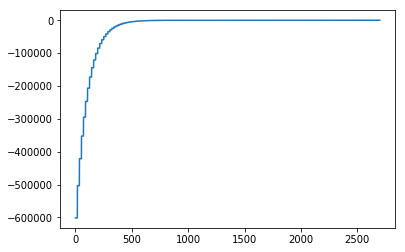

In [16]:
plt.plot(error_list)
plt.show()

# Calculating costfunction and accuracy for training data

In [17]:
C = np.mean((cost(Thetas, Theta1, X, Y)**2)/2)
MaxError = np.mean((Y**2))
AccuracyTrain = 100 - (C/MaxError)*100
AccuracyTrain

100.0

# Calculating cost function and accuracy for testing data

In [18]:

TestC = np.mean((cost(Thetas,Theta1, xtest, ytest)**2)/2)
TestError = np.mean(ytest**2)
Accuracy = 100 - (TestC/TestError)*100
print("Accuracy of the model is", Accuracy,"%")

Accuracy of the model is 99.79451572391508 %
